# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from Homework6_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [8]:
# Save config information.
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Build partial query URL and check response
#query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(url+"&q="+ city).json()
response

{'coord': {'lon': -155.09, 'lat': 19.73},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 78.46,
  'feels_like': 77.47,
  'temp_min': 73.99,
  'temp_max': 82.4,
  'pressure': 1020,
  'humidity': 61},
 'visibility': 16093,
 'wind': {'speed': 10.29, 'deg': 80},
 'clouds': {'all': 75},
 'dt': 1591484326,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1591458052,
  'sunset': 1591505867},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Saving cities information from Api
print("Beginning Data Retrieval")
print("---------------------------")
Record=1
Set=1
lat = []
lng= []
Max_temp = []
hum = []
cld= []
wnd_speed=[]
country= []
date= []
citiesc= []

for city in cities:
    try:
        response = requests.get(url+"&q="+ city).json()
        print(f"Processing Record {Record} of Set {Set} | {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']["all"])
        wnd_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        citiesc.append(response['name'])
    except:
        print(f"City not found. Skipping...")
        pass
    
    if Record<51:
        Record=Record+1
    if Record==51:
        Record=1
        Set=Set+1

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | wadena
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | bjornevatn
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | zhigansk
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | velikodvorskiy
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | saint-georges
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | udimskiy
Processing Record 15 of Set 1 | mayahi
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | anloga
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | zemio
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | corsicana
Processing Record 22 of Set 1 | trincomalee
Processing Record 23 of Set 1 | kruisfontei

Processing Record 42 of Set 4 | marica
Processing Record 43 of Set 4 | gold coast
Processing Record 44 of Set 4 | xingyi
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | camocim
Processing Record 47 of Set 4 | cumra
Processing Record 48 of Set 4 | san quintin
Processing Record 49 of Set 4 | san vicente
Processing Record 50 of Set 4 | saint-jean-de-maurienne
Processing Record 1 of Set 5 | dhar
Processing Record 2 of Set 5 | gambela
Processing Record 3 of Set 5 | seymchan
Processing Record 4 of Set 5 | maarianhamina
Processing Record 5 of Set 5 | isiro
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | bilma
Processing Record 8 of Set 5 | velyka bahachka
Processing Record 9 of Set 5 | edson
Processing Record 10 of Set 5 | wagar
Processing Record 11 of Set 5 | vicuna
Processing Record 12 of Set 5 | tiksi
Processing Record 13 of Set 5 | vaovai
City not found. Skipping...
Processing Record 14 of Set 5 | guerrero negro
Processing Record 15 of Set 

Processing Record 25 of Set 8 | utiroa
City not found. Skipping...
Processing Record 26 of Set 8 | lakatoro
Processing Record 27 of Set 8 | banting
Processing Record 28 of Set 8 | hammerfest
Processing Record 29 of Set 8 | batouri
Processing Record 30 of Set 8 | tapejara
Processing Record 31 of Set 8 | kashary
Processing Record 32 of Set 8 | ventspils
Processing Record 33 of Set 8 | douglas
Processing Record 34 of Set 8 | honiara
Processing Record 35 of Set 8 | warrington
Processing Record 36 of Set 8 | seoul
Processing Record 37 of Set 8 | kizema
Processing Record 38 of Set 8 | gogrial
Processing Record 39 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 40 of Set 8 | filadelfia
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | manokwari
Processing Record 43 of Set 8 | woodstock
Processing Record 44 of Set 8 | rapid valley
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | chagda
City not found. Skipping...
Processing 

Processing Record 12 of Set 12 | jeremie
Processing Record 13 of Set 12 | birin
Processing Record 14 of Set 12 | nador
Processing Record 15 of Set 12 | pangai
Processing Record 16 of Set 12 | opobo
City not found. Skipping...
Processing Record 17 of Set 12 | wamba
Processing Record 18 of Set 12 | umtata
Processing Record 19 of Set 12 | pyaozerskiy
Processing Record 20 of Set 12 | sant julia de loria
Processing Record 21 of Set 12 | tiznit
Processing Record 22 of Set 12 | abu samrah
Processing Record 23 of Set 12 | campbell river
Processing Record 24 of Set 12 | turayf
Processing Record 25 of Set 12 | aksarka
Processing Record 26 of Set 12 | shitanjing
Processing Record 27 of Set 12 | waipawa
Processing Record 28 of Set 12 | mareeba
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | sharya
Processing Record 31 of Set 12 | zhangye
Processing Record 32 of Set 12 | lompoc
Processing Record 33 of Set 12 | kamwenge
Processing Record 34 of Set 12 | mizdah
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data=pd.DataFrame({"Cities":citiesc,
                           "Latitude":lat,
                           "Longitude":lng,
                           "Max Temp":Max_temp,
                           "Humidity":hum,
                           "Cloudiness":cld,
                           "Wind Speed":wnd_speed,
                           "Country":country,
                           "Date":date})
weather_data.to_csv("Weather_cities.csv")
weather_data


,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,49.19,74,88,26.69,NZ,1591484330
1,Saskylakh,71.92,114.08,42.66,61,100,8.61,RU,1591484147
2,Rikitea,-23.12,-134.97,73.74,90,100,27.56,PF,1591484331
3,Wadena,46.44,-95.14,66.20,52,90,16.11,US,1591484331
4,Narsaq,60.92,-46.05,53.60,50,100,20.80,GL,1591484106
...,...,...,...,...,...,...,...,...,...
584,Odesskoye,54.21,72.97,56.28,80,7,5.23,RU,1591484610
585,Ostrov,57.34,28.35,50.00,93,14,2.24,RU,1591484375
586,Brae,60.40,-1.35,46.40,93,100,27.51,GB,1591484612
587,Dalmatovo,56.26,62.94,52.70,66,0,5.30,RU,1591484613


In [11]:
weather_data.count()

Cities        589
Latitude      589
Longitude     589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
cities_hum=weather_data.loc[weather_data["Humidity"]>100]
cities_hum.count()

Cities        0
Latitude      0
Longitude     0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

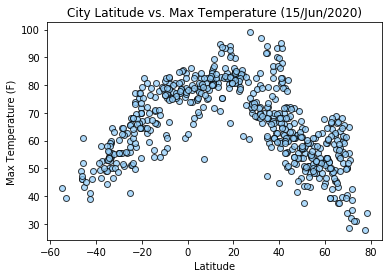

In [13]:
plt.scatter(lat, Max_temp, marker="o", facecolors="#95d0fc", edgecolor="black",
           alpha=0.75)
plt.title('City Latitude vs. Max Temperature (15/Jun/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#This plot shows the relation betweet the geographic location (Latitude) and the Maximun temperature for the cities, 
#we can see near equator (Lat=0) Max temperatures are higher

## Latitude vs. Humidity Plot

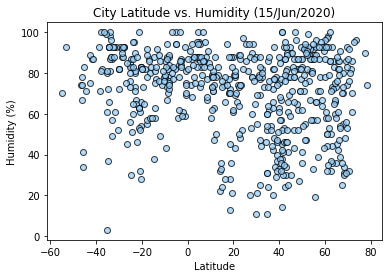

In [14]:
plt.scatter(lat, hum, marker="o", facecolors="#95d0fc", edgecolor="black",
           alpha=0.75)
plt.title('City Latitude vs. Humidity (15/Jun/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#This plot shows the relation betweet the geographic location (Latitude) and Humidity percentaje of the cities, 
#we can't see an evident relation between this 2 variables, but we can see most cities have Humidity percetajes above 40%

## Latitude vs. Cloudiness Plot

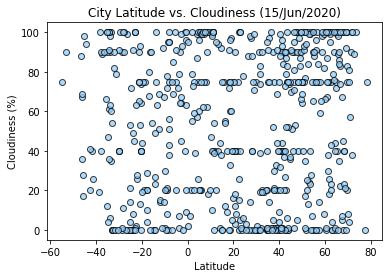

In [15]:
plt.scatter(lat, cld, marker="o", facecolors="#95d0fc", edgecolor="black",
           alpha=0.75)
plt.title('City Latitude vs. Cloudiness (15/Jun/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
#This plot shows the relation betweet the geographic location (Latitude) and Cloudiness percentaje, 
#we can't see an evident relation between this 2 variables, but we can clusters around 0%, 40%, 80% and 100%

## Latitude vs. Wind Speed Plot

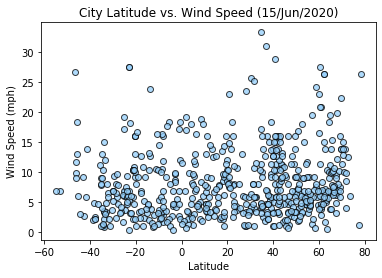

In [16]:
plt.scatter(lat, wnd_speed, marker="o", facecolors="#95d0fc", edgecolor="black",
           alpha=0.75)
plt.title('City Latitude vs. Wind Speed (15/Jun/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#This plot shows the relation betweet the geographic location (Latitude) and Wind Speed for the cities, 
#we can't see an evident relation between this 2 variables, but we can see most cities have Wind Speed under 20mph

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
cities_NH=weather_data.loc[weather_data["Latitude"]>0]
cities_SH=weather_data.loc[weather_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5726470971155433


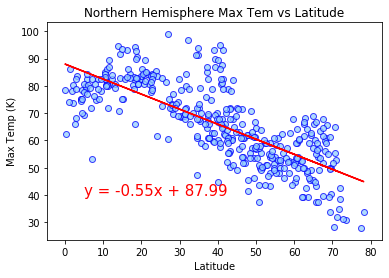

In [51]:
Lat_NH=cities_NH["Latitude"]
MxT_NH=cities_NH["Max Temp"]
x_values = Lat_NH
y_values = MxT_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.scatter(Lat_NH, MxT_NH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Northern Hemisphere Max Tem vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#This graph and regression models show us the relationship between te location of cities above the equator, 
#as we go North from equator we see a decrease in Max temperature

##Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6900335882172428


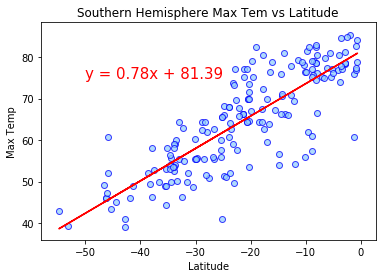

In [45]:
Lat_SH=cities_SH["Latitude"]
MxT_SH=cities_SH["Max Temp"]
x_values = Lat_SH
y_values = MxT_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")
plt.scatter(Lat_SH, MxT_SH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Southern Hemisphere Max Tem vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#This graph and regression models show us the relationship between te location of cities under the equator, 
#as we go south from equator we see a decrease in Max temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007383404754358631


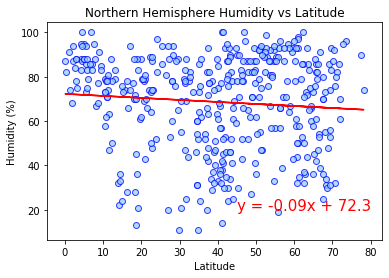

In [46]:
Lat_NH=cities_NH["Latitude"]
Hum_NH=cities_NH["Humidity"]
x_values = Lat_NH
y_values = Hum_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.scatter(Lat_NH, Hum_NH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#In this case we can see that our R2 shows no relation between Latitude and Humidity for cities in the Souther Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00014240313206502692


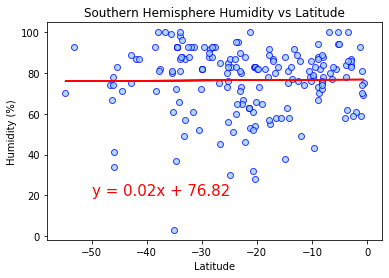

In [47]:
Lat_SH=cities_SH["Latitude"]
Hum_SH=cities_SH["Humidity"]
x_values = Lat_SH
y_values = Hum_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.scatter(Lat_SH, Hum_SH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#In this case we can see that our R2 shows no evidece of corraltion between Latitude and 
#Humidity for cities in the Souther Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004970182058872971


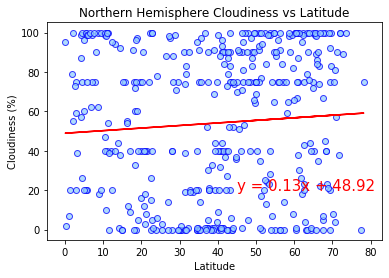

In [48]:
Lat_NH=cities_NH["Latitude"]
Cld_NH=cities_NH["Cloudiness"]
x_values = Lat_NH
y_values = Cld_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.scatter(Lat_NH, Cld_NH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#In this case we can see that our R2 shows no evidece of corraltion between Latitude and 
#Cloudiness for cities in the Norther Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0022661884940632067


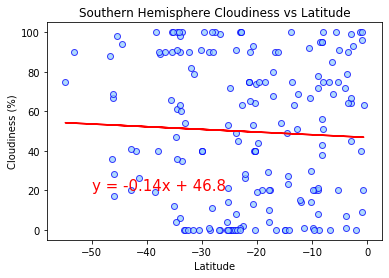

In [49]:
Lat_SH=cities_SH["Latitude"]
Cld_SH=cities_SH["Cloudiness"]
x_values = Lat_SH
y_values = Cld_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.scatter(Lat_SH, Cld_SH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#The same case for the Southern Hemisphere, there is no evidece of corraltion between Latitude and Cloudiness 
#according to the R2

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012390987579852696


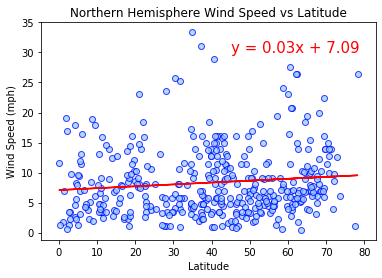

In [50]:
Lat_NH=cities_NH["Latitude"]
WS_NH=cities_NH["Wind Speed"]
x_values = Lat_NH
y_values = WS_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.scatter(Lat_NH, WS_NH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#For cities in the Northern Hemisphere we can't find an R2 that show us a relation between Wind Speed an Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00022322943377504784


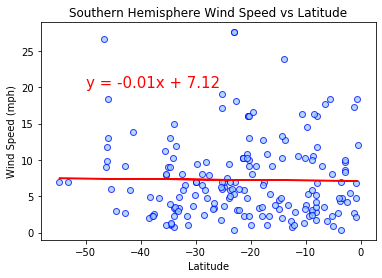

In [52]:
Lat_SH=cities_SH["Latitude"]
WS_SH=cities_SH["Wind Speed"]
x_values = Lat_SH
y_values = WS_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.scatter(Lat_SH, WS_SH, marker="o", facecolors="#95d0fc", edgecolor="blue",
           alpha=0.75)
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#For cities in the Southern Hemisphere we can't find an R2 that show us a relation between Wind Speed an Latitude